### Определяем ликвидность по "красоте" свечек.
Ликвидность по долларовому объему (см прошлый ноут) 
нужного результата не дала, похоже, из-за adjusted данных


In [1]:
import glob, os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

In [2]:
path = '/home/dev_serverov/Documents/US_stocks/Data/US_stocks_csv'
exchange_list = ['AMEX', 'NASDAQ', 'NYSE', 'NYSE Arca', 'Delisted']


In [4]:
index_list = list(range(1985, 2019))
first_file = True

for exchange in tqdm_notebook(exchange_list, desc = 'exchange loop'):
    all_files = glob.glob(os.path.join(path, exchange, '*.csv'))

    for f in tqdm_notebook(all_files, desc = 'files loop', leave = False):
        df = pd.read_csv(f)
        df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='ignore')
        df = df.set_index('Date')
#        df['Vol_dol'] = df['Close']*df['Volume']

        col_name = str(df.Ticker[0]) + '_' + exchange

        if first_file:
            df2 = pd.DataFrame(index=index_list, columns = [col_name])
            first_file = False            

        df2[col_name] = 0
        first_year = df.index[0].year
        last__year = df.index[-1].year

        for i in range(first_year, last__year+1):
            open_t = np.array(df[str(i)]['Open'])
            high_t = np.array(df[str(i)]['High'])
            low_t = np.array(df[str(i)]['Low'])
            close_t = np.array(df[str(i)]['Close'])
            
#            mask_all_candle = df[str(i)]['Volume'] >0
            mask_bad_candle = (((open_t == high_t) & (close_t == low_t)) | \
                              ((open_t == low_t) & (close_t == high_t)) | \
                              ((open_t == low_t) & (open_t == high_t) & (open_t == close_t)))


            
            sum_all_candle = len(df[str(i)].index)
            df2[col_name][i] = 0
            if sum_all_candle != 0: 
                df2[col_name][i] = round(sum(mask_bad_candle)*100/sum_all_candle, 1)



In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1985 to 2018
Columns: 27651 entries, RIF_AMEX to PNTH-199404_Delisted
dtypes: int64(27651)
memory usage: 7.2 MB


In [6]:
df2.shape

(34, 27651)

In [7]:
df2

,RIF_AMEX,CTEK_AMEX,EVI_AMEX,IAF_AMEX,EIV_AMEX,AE_AMEX,CVR_AMEX,BGSF_AMEX,GSV_AMEX,LTSK_AMEX,...,TDSNA-201201_Delisted,EIC-199710_Delisted,ENN-200710_Delisted,ZICA-200904_Delisted,MHI-199411_Delisted,MSPD-201312_Delisted,PORT-200307_Delisted,LMED-198910_Delisted,AIK-200402_Delisted,PNTH-199404_Delisted
1985,0,0,0,90,0,55,93,0,0,0,...,0,89,0,0,0,0,0,41,0,0
1986,0,0,0,71,0,71,87,0,0,0,...,0,81,0,0,0,0,0,35,0,0
1987,0,0,0,63,0,74,92,0,0,0,...,0,81,0,0,0,0,0,25,0,0
1988,0,0,0,45,0,82,95,0,0,0,...,0,92,0,0,0,0,0,40,0,0
1989,0,0,0,40,0,86,96,0,0,0,...,0,86,0,0,0,0,0,42,0,0
1990,0,0,98,46,0,76,96,0,0,0,...,0,88,0,0,0,0,0,0,0,100
1991,0,0,92,41,0,79,95,0,0,0,...,0,76,0,0,94,0,0,0,0,100
1992,0,0,93,52,0,72,92,0,0,0,...,0,39,0,0,84,0,0,0,0,92
1993,0,0,93,41,0,83,92,0,0,0,...,0,20,0,0,53,0,0,0,0,39
1994,0,0,97,35,0,76,73,0,0,0,...,0,32,25,76,40,0,0,0,59,22


In [8]:
df2.to_csv('/home/dev_serverov/Documents/US_stocks/Data/liquidity_candle_table.csv')

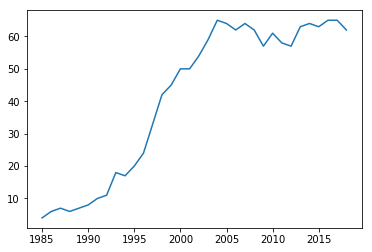

In [20]:
good_level = 20
df2[str(good_level)] = 0
for i in range(df2.index[0], df2.index[-1]+1):
    all_tickers = np.array(df2.loc[i])
    mask = ((all_tickers > 0) & (all_tickers< good_level))
    mask2 = (all_tickers > 0)
    df2[str(good_level)][i] = all_tickers[mask].size*100/all_tickers[mask2].size
plt.plot(df2[str(good_level)])

In [21]:
df2[str(good_level)]

1985     4
1986     6
1987     7
1988     6
1989     7
1990     8
1991    10
1992    11
1993    18
1994    17
1995    20
1996    24
1997    33
1998    42
1999    45
2000    50
2001    50
2002    54
2003    59
2004    65
2005    64
2006    62
2007    64
2008    62
2009    57
2010    61
2011    58
2012    57
2013    63
2014    64
2015    63
2016    65
2017    65
2018    62
Name: 20, dtype: int64

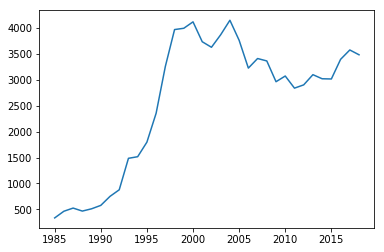

In [18]:
good_level = 20
df2[str(good_level)+'_stocks'] = 0
for i in range(df2.index[0], df2.index[-1]+1):
    all_tickers = np.array(df2.loc[i])
    mask = ((all_tickers > 0) & (all_tickers< good_level))
    df2[str(good_level)+'_stocks'][i] = all_tickers[mask].size
plt.plot(df2[str(good_level)+'_stocks'])

In [19]:
df2[str(good_level)+'_stocks']

1985     334
1986     463
1987     524
1988     466
1989     510
1990     576
1991     750
1992     877
1993    1485
1994    1516
1995    1797
1996    2355
1997    3259
1998    3971
1999    3996
2000    4120
2001    3736
2002    3629
2003    3871
2004    4151
2005    3764
2006    3227
2007    3412
2008    3365
2009    2964
2010    3074
2011    2840
2012    2903
2013    3100
2014    3021
2015    3017
2016    3396
2017    3577
2018    3484
Name: 20_stocks, dtype: int64